### importing all the required libraries

In [190]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy import asarray
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tensorflow

###  Reading the Data in the CSV file

I have used "Metro Interstate Traffic Volume Data Set" from UCI (https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [153]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv',sep=',')

###  Map functions to transform input Columns
In map_hoiday function I have classified non-holiday days as a 0 . 
In map_time function since traffic depends on the time of the day I have mapped date and time to hour of the day. and converted that string to Int.

In [154]:
def map_holiday(x):
    if x=="None":
        return 0
    else:
        return 1
def map_time(x):
    y = x.split(' ')
    hour = y[1].split(":")[0]
    return int(hour)

In [155]:
df['holiday'] = df['holiday'].map(map_holiday)
df['hour']= df['date_time'].map(map_time)

In [156]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,0,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,0,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,0,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


### Normalizing Output Y and Removing Some Input Columns
Since output of sigmoid is between 0 and 1 , We have to normalize the output . Also removed some colums whose values are not very helpful or those colums are transformed to other value. 


In [160]:
y= df[['traffic_volume']]
scale_y = MinMaxScaler(feature_range=(0,1))
y = scale_y.fit_transform(y)
df=df.drop(['weather_description', 'date_time','weather_main','traffic_volume'], axis=1)

### Split the data between Training set and Test Set
Used sklearn to split the total data into training data and test data. Used 70 percent of data as a training data.

In [161]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df,y, test_size=0.3, random_state=108, shuffle=True)

In [162]:
len(x_train)

33742

### Create a Model Using Keras Library And Train it
We are implementing D-2D-1 structure for functional approximation. First hidden layer has 2*input_size  number of nuerons . And After that we have output layer. We have used sigmoid activation function as asked in the assignment. To intialize weights of edges we have used 'he_uniform' kernel initalizer. We have used Adam optimizer with learning rate of 0.0005 . We are using mean square error. After that we have used 1000 iteration ( found the value of epoch by trial and error) of gradient descent to mininmize MSE.  

In [211]:
model = Sequential()
model.add(tf.keras.layers.Dense(units = 2*len(x_train.columns),
                                kernel_initializer='he_uniform', activation = 'sigmoid', 
                                input_shape = (len(x_train.columns),)))
model.add(tf.keras.layers.Dense(units = 1))
optimizer = tensorflow.keras.optimizers.Adam(lr=0.0005)
model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mse'])

In [212]:
fitted_model = model.fit(x_train, y_train, epochs =1000, validation_data=(x_test,y_test), batch_size = 33742)

Epoch 1/1000
1/1 [==============================] - 0s 87ms/step - loss: 0.1309 - mse: 0.1309 - val_loss: 0.1307 - val_mse: 0.1307
Epoch 2/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1299 - mse: 0.1299 - val_loss: 0.1297 - val_mse: 0.1297
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1289 - mse: 0.1289 - val_loss: 0.1288 - val_mse: 0.1288
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1279 - mse: 0.1279 - val_loss: 0.1280 - val_mse: 0.1280
Epoch 5/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1270 - mse: 0.1270 - val_loss: 0.1271 - val_mse: 0.1271
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1261 - mse: 0.1261 - val_loss: 0.1263 - val_mse: 0.1263
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1253 - mse: 0.1253 - val_loss: 0.1255 - val_mse: 0.1255
Epoch 8/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1244 - m

In [213]:
model_loss = pd.DataFrame(model.history.history)

### Plot of MSE vs Epochs
As we can see during first 200 iteration MSE reduces quite drastically . But after 200 epochs it's value become stable . Please note that MSE here is plotted on the normalized value of Y. As we can see test MSE and value MSE follows similar path


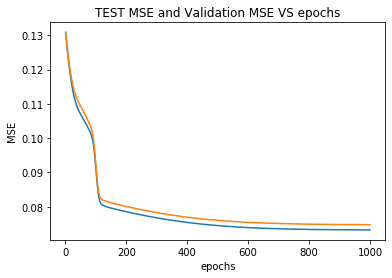

In [223]:
plt.plot(range(1,len(model_loss)+1),model_loss.mse)
plt.plot(range(1,len(model_loss)+1),model_loss.val_mse)
plt.title('TEST MSE and Validation MSE VS epochs')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()


In [221]:
print(model.history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])
